In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

penguins = pd.read_csv("data/penguins_classification.csv")
culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_column = "Species"

In [3]:
from sklearn.model_selection import train_test_split

data, target = penguins[culmen_columns], penguins[target_column]
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=0
)

In [4]:
from sklearn.linear_model import LogisticRegression

linear_model = LogisticRegression()
linear_model.fit(data_train, target_train)

test_score = linear_model.score(data_test, target_test)
test_score

0.9767441860465116

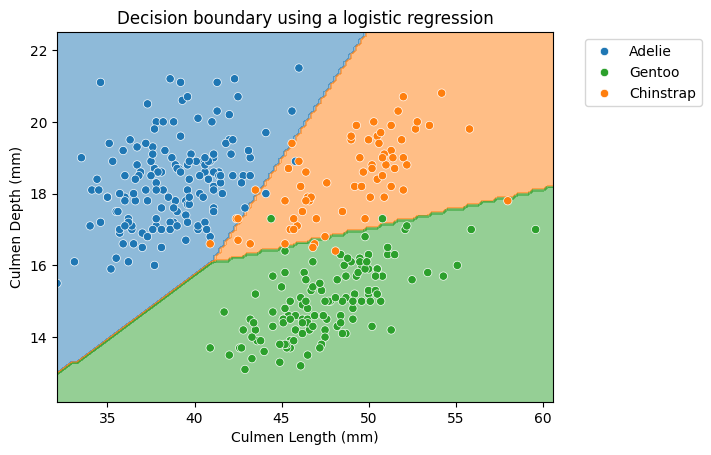

In [5]:
import matplotlib as mpl
from sklearn.inspection import DecisionBoundaryDisplay

tab10_norm = mpl.colors.Normalize(vmin=-0.5, vmax=8.5)
palette = ['tab:blue', 'tab:green', 'tab:orange']

# Model has to be fitted first before calling DecisionBoundaryDisplay
dbd = DecisionBoundaryDisplay.from_estimator(
    linear_model, data_train, response_method='predict',
    cmap='tab10', norm=tab10_norm, alpha=0.5
)
sns.scatterplot(
    data=penguins, 
    x=culmen_columns[0],
    y=culmen_columns[1],
    hue=target_column,
    palette=palette,
)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
_ = plt.title('Decision boundary using a logistic regression')

In [6]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=1)
tree.fit(data_train, target_train)

,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


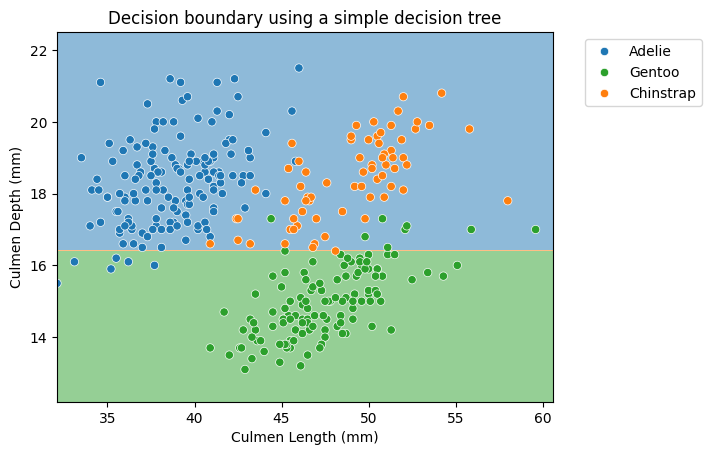

In [7]:
dbd = DecisionBoundaryDisplay.from_estimator(
    tree, data_train, response_method='predict',
    cmap='tab10', norm=tab10_norm, alpha=0.5
)
sns.scatterplot(
    data=penguins, 
    x=culmen_columns[0],
    y=culmen_columns[1],
    hue=target_column,
    palette=palette,
)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
_ = plt.title('Decision boundary using a simple decision tree')

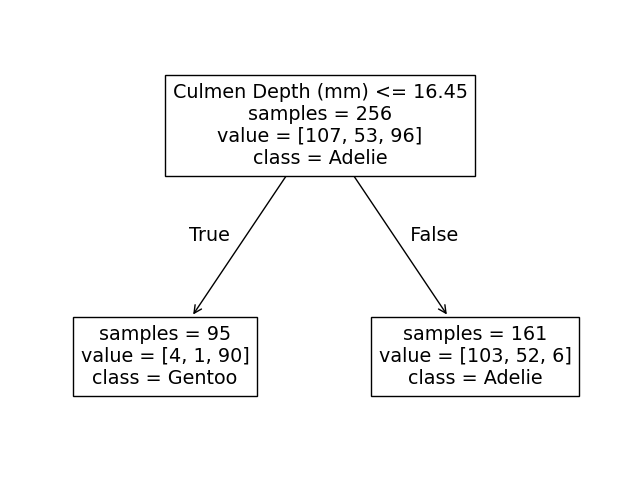

In [8]:
# Plot the fitted tree
from sklearn.tree import plot_tree
_, ax = plt.subplots(figsize=(8, 6))
_ = plot_tree(
    tree, feature_names=culmen_columns,
    class_names=tree.classes_.tolist(),
    impurity=False,
    ax=ax,
)

In [9]:
test_penguin_2 = pd.DataFrame(
    {"Culmen Length (mm)": [0], "Culmen Depth (mm)": [17]}
)
test_penguin_2

,Culmen Length (mm),Culmen Depth (mm)
0,0,17


In [10]:
tree.predict(test_penguin_2)

array(['Adelie'], dtype=object)

In [11]:
y_pred_proba = tree.predict_proba(test_penguin_2)
y_pred_proba

array([[0.63975155, 0.32298137, 0.03726708]])

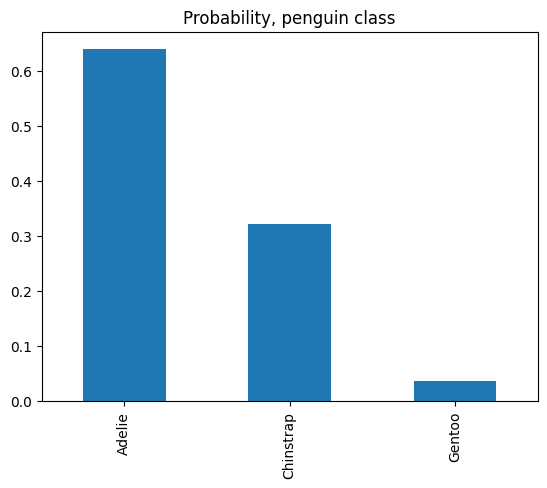

In [12]:
y_pred_class_0 = pd.Series(y_pred_proba[0], index=tree.classes_)
y_pred_class_0.plot.bar()
_ = plt.title('Probability, penguin class')

In [13]:
penguins = pd.read_csv("data/penguins_classification.csv")
culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_column = "Species"

data, target = penguins[culmen_columns], penguins[target_column]
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=0
)

In [14]:
from sklearn.tree import DecisionTreeClassifier

tree2 = DecisionTreeClassifier(max_depth=2)
tree2.fit(data_train, target_train)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


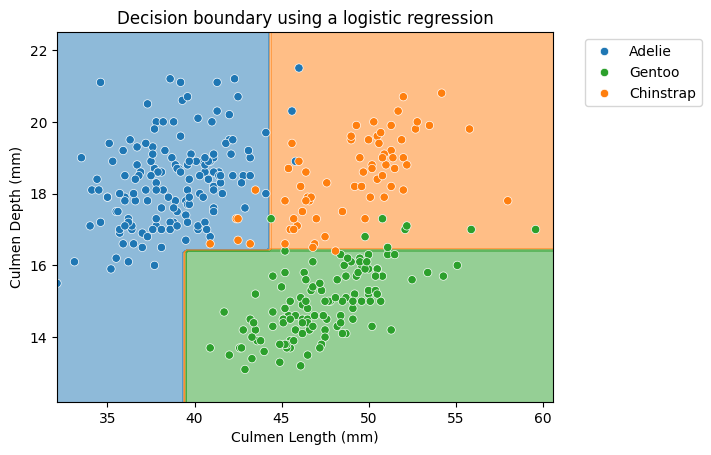

In [15]:
# Plot decision boundary
import matplotlib as mpl
from sklearn.inspection import DecisionBoundaryDisplay

tab10_norm = mpl.colors.Normalize(vmin=-0.5, vmax=8.5)
palette = ['tab:blue', 'tab:green', 'tab:orange']

# Model has to be fitted first before calling DecisionBoundaryDisplay
dbd = DecisionBoundaryDisplay.from_estimator(
    tree2, data_train, response_method='predict',
    cmap='tab10', norm=tab10_norm, alpha=0.5
)
sns.scatterplot(
    data=penguins, 
    x=culmen_columns[0],
    y=culmen_columns[1],
    hue=target_column,
    palette=palette,
)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
_ = plt.title('Decision boundary using a logistic regression')

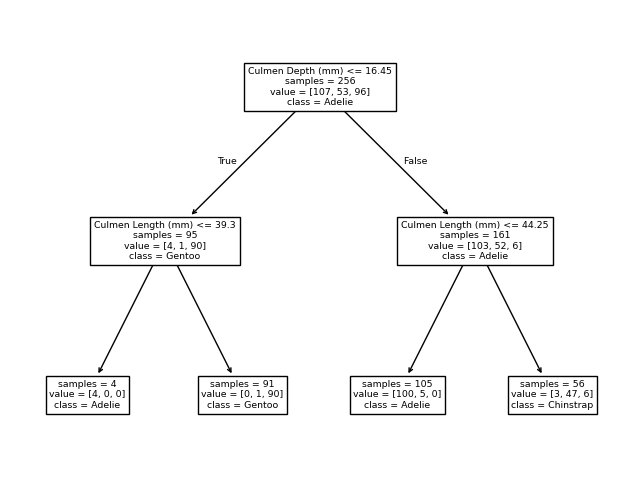

In [16]:
from sklearn.tree import plot_tree

_, ax = plt.subplots(figsize=(8, 6))
_ = plot_tree(
    tree2, feature_names=culmen_columns,
    class_names=tree2.classes_.tolist(),
    impurity=False,
    ax=ax
)

In [17]:
test_score = tree2.score(data_test, target_test)
test_score

0.9651162790697675

In [18]:
# Decision tree in regression problems
penguins = pd.read_csv("data/penguins_regression.csv")

feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"
data_train, target_train = penguins[[feature_name]], penguins[target_name]

data_test = pd.DataFrame(
    np.arange(data_train[feature_name].min(), data_train[feature_name].max()),
    columns=[feature_name],
)

<Axes: xlabel='Flipper Length (mm)', ylabel='Body Mass (g)'>

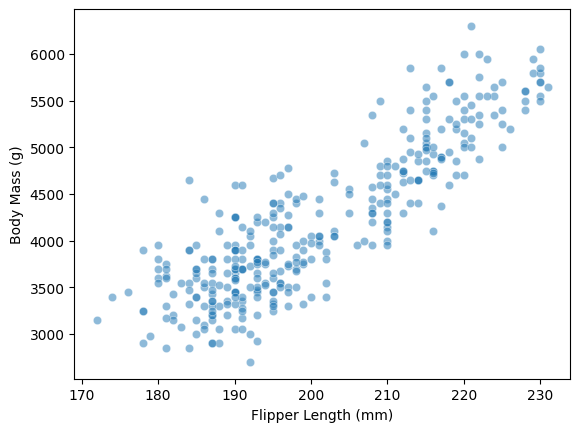

In [19]:
sns.scatterplot(
    data=penguins, x=feature_name, y=target_name, alpha=0.5
)

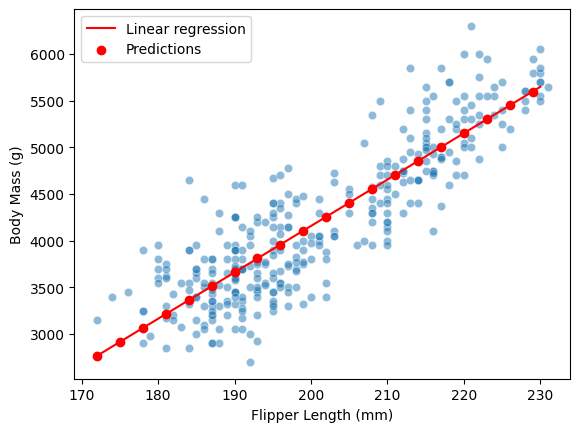

In [20]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(data_train, target_train)
target_predicted = linear_model.predict(data_test)
sns.scatterplot(data=penguins, x=feature_name, y=target_name, alpha=0.5)
_ = plt.plot(data_test, target_predicted, color='red', label='Linear regression')
plt.scatter(
    data_test[::3],
    target_predicted[::3],
    label='Predictions',
    color='red'
)
plt.legend()

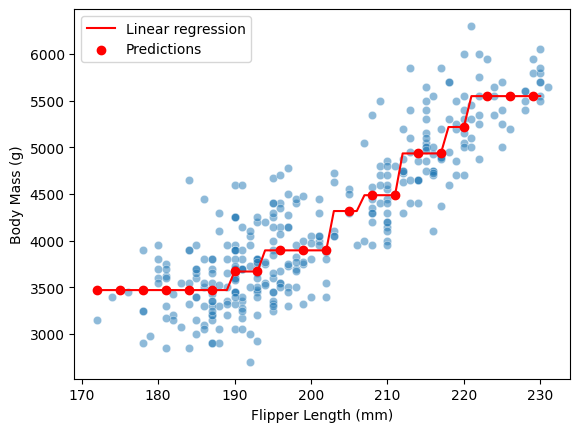

In [21]:
from sklearn.tree import DecisionTreeRegressor
tree3 = DecisionTreeRegressor(max_depth=3)
tree3.fit(data_train, target_train)
target_tree3 = tree3.predict(data_test)
sns.scatterplot(data=penguins, x=feature_name, y=target_name, alpha=0.5)
_ = plt.plot(data_test, target_tree3, color='red', label='Linear regression')
plt.scatter(
    data_test[::3],
    target_tree3[::3],
    label='Predictions',
    color='red'
)
plt.legend()

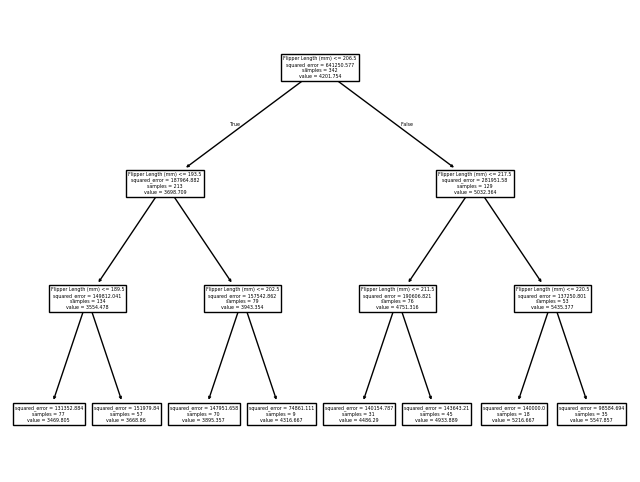

In [22]:
fig, ax = plt.subplots(figsize=(8, 6))
_ = plot_tree(tree3, feature_names=[feature_name], ax=ax)

In [23]:
# Exercise M5.02
penguins = pd.read_csv("data/penguins_regression.csv")

feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"
data_train, target_train = penguins[[feature_name]], penguins[target_name]

In [24]:
linear_model = LinearRegression()
linear_model.fit(data_train, target_train)

tree_model = DecisionTreeRegressor(max_depth=3)
tree_model.fit(data_train, target_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [25]:
data_test = pd.DataFrame(
    np.arange(data_train[feature_name].min(), data_train[feature_name].max()),
    columns=[feature_name],
)
linear_pred = linear_model.predict(data_test)
tree_pred = tree_model.predict(data_test)

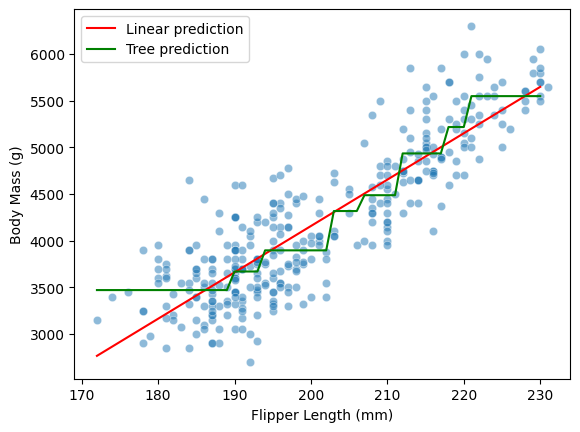

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(
    data=penguins, x=feature_name, y=target_name, alpha=0.5
)
_ = plt.plot(data_test, linear_pred, color='red', label='Linear prediction')
_ = plt.plot(data_test, tree_pred, color='green', label='Tree prediction')
plt.legend()

In [28]:
data_test.tail()

,Flipper Length (mm)
54,226.0
55,227.0
56,228.0
57,229.0
58,230.0


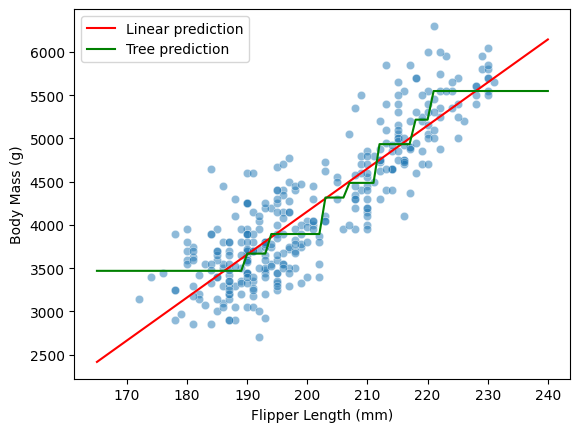

In [32]:
new_min = pd.DataFrame({'Flipper Length (mm)':[165, 170]})
new_max = pd.DataFrame({'Flipper Length (mm)':[235, 240]})
data_test2 = pd.concat([new_min, data_test, new_max], ignore_index=True)
linear_pred2 = linear_model.predict(data_test2)
tree_pred2 = tree_model.predict(data_test2)

sns.scatterplot(
    data=penguins, x=feature_name, y=target_name, alpha=0.5
)
_ = plt.plot(data_test2, linear_pred2, color='red', label='Linear prediction')
_ = plt.plot(data_test2, tree_pred2, color='green', label='Tree prediction')
plt.legend()

In [33]:
# Hyperparameter tuning in decision tree models
import pandas as pd

data_clf_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_clf_column = "Species"
data_clf = pd.read_csv("data/penguins_classification.csv")

data_reg_columns = ["Flipper Length (mm)"]
target_reg_column = "Body Mass (g)"
data_reg = pd.read_csv("data/penguins_regression.csv")

In [34]:
# Two helper functions
def fit_and_plot_classification(model, data, feature_names, target_names):
    model.fit(data[feature_names], data[target_names])
    if data[target_names].nunique() == 2:
        palette = ["tab:red", "tab:blue"]
    else:
        palette = ["tab:red", "tab:blue", "black"]
    DecisionBoundaryDisplay.from_estimator(
        model,
        data[feature_names],
        response_method="predict",
        cmap="RdBu",
        alpha=0.5,
    )
    sns.scatterplot(
        data=data,
        x=feature_names[0],
        y=feature_names[1],
        hue=target_names,
        palette=palette,
    )
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")


def fit_and_plot_regression(model, data, feature_names, target_names):
    model.fit(data[feature_names], data[target_names])
    data_test = pd.DataFrame(
        np.arange(data.iloc[:, 0].min(), data.iloc[:, 0].max()),
        columns=data[feature_names].columns,
    )
    target_predicted = model.predict(data_test)

    sns.scatterplot(
        x=data.iloc[:, 0], y=data[target_names], color="black", alpha=0.5
    )
    plt.plot(data_test.iloc[:, 0], target_predicted, linewidth=4)

In [37]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': np.arange(2, 10, 1)}
tree_clf = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid)
tree_reg = GridSearchCV(DecisionTreeRegressor(), param_grid=param_grid)
tree_clf.fit(data_clf[data_clf_columns], data_clf[target_clf_column])
tree_reg.fit(data_reg[data_reg_columns], data_reg[target_reg_column])
tree_clf.best_params_, tree_reg.best_params_

({'max_depth': np.int64(7)}, {'max_depth': np.int64(3)})

In [38]:
# Another helper function to create mixed data
from sklearn.datasets import make_blobs

data_clf_columns = ["Feature #0", "Feature #1"]
target_clf_column = "Class"

# Blobs that are interlaced
X_1, y_1 = make_blobs(
    n_samples=300, centers=[[0, 0], [-1, -1]], random_state=0
)
# Blobs that can be easily separated
X_2, y_2 = make_blobs(n_samples=300, centers=[[3, 6], [7, 0]], random_state=0)

X = np.concatenate([X_1, X_2], axis=0)
y = np.concatenate([y_1, y_2])
data_clf = np.concatenate([X, y[:, np.newaxis]], axis=1)
data_clf = pd.DataFrame(
    data_clf, columns=data_clf_columns + [target_clf_column]
)
data_clf[target_clf_column] = data_clf[target_clf_column].astype(np.int32)

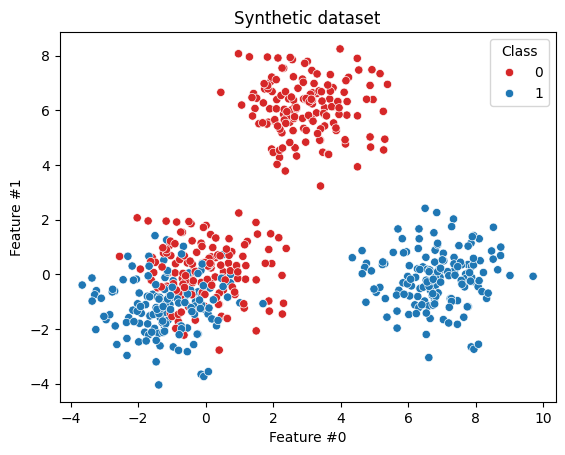

In [39]:
sns.scatterplot(
    data=data_clf,
    x=data_clf_columns[0],
    y=data_clf_columns[1],
    hue=target_clf_column,
    palette=["tab:red", "tab:blue"],
)
_ = plt.title("Synthetic dataset")

In [40]:
# Quiz 5
import pandas as pd

ames_housing = pd.read_csv(
    "data/ames_housing_no_missing.csv",
    na_filter=False,  # required for pandas>2.0
)
target_name = "SalePrice"
data = ames_housing.drop(columns=target_name)
target = ames_housing[target_name]

In [41]:
numerical_features = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

data_numerical = data[numerical_features]

In [52]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate

linear_model = make_pipeline(StandardScaler(), LinearRegression())
tree_model = DecisionTreeRegressor()

cv_linear = cross_validate(linear_model, data_numerical, target, cv=10)
linear_scores = cv_linear['test_score']
cv_tree = cross_validate(tree_model, data_numerical, target, cv=10)
tree_scores = cv_tree['test_score']
combined_scores = pd.DataFrame({'linear': linear_scores, 'tree': tree_scores})
combined_scores['diff'] = combined_scores['linear'] - combined_scores['tree']

In [53]:
combined_scores

,linear,tree,diff
0,0.761300,0.545901,0.215399
1,0.806351,0.709377,0.096974
2,0.811890,0.704886,0.107004
3,0.665922,0.445316,0.220606
4,0.799649,0.732546,0.067103
5,0.768688,0.637826,0.130862
6,0.756351,0.534325,0.222026
7,0.718221,0.612136,0.106085
8,0.314793,0.507393,-0.192600
9,0.786352,0.680258,0.106094


In [57]:
# Hyperparameter search for the tree model
param_grid = {'max_depth': np.arange(1, 15, 1)}
tree_tuned = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=10, n_jobs=-1)
cv_tree_tuned = cross_validate(tree_tuned, 
                               data_numerical, 
                               target, 
                               cv=10, 
                               n_jobs=-1,
                               return_estimator=True)


c:\ESL\Learning\.venv\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


In [58]:
# Access best params from each fold
print("\nBest parameters per fold:")
for i, estimator in enumerate(cv_tree_tuned['estimator']):
    print(f"  Fold {i+1}: {estimator.best_params_}")
    print(f"           Score: {estimator.best_score_:.4f}")


Best parameters per fold:
  Fold 1: {'max_depth': np.int64(3)}
           Score: 0.0160
  Fold 2: {'max_depth': np.int64(2)}
           Score: 0.0198
  Fold 3: {'max_depth': np.int64(6)}
           Score: 0.0160
  Fold 4: {'max_depth': np.int64(5)}
           Score: 0.0175
  Fold 5: {'max_depth': np.int64(3)}
           Score: 0.0160
  Fold 6: {'max_depth': np.int64(5)}
           Score: 0.0167
  Fold 7: {'max_depth': np.int64(3)}
           Score: 0.0198
  Fold 8: {'max_depth': np.int64(3)}
           Score: 0.0168
  Fold 9: {'max_depth': np.int64(5)}
           Score: 0.0152
  Fold 10: {'max_depth': np.int64(2)}
           Score: 0.0190


In [59]:
from sklearn.model_selection import GridSearchCV

params = {"max_depth": np.arange(1, 16)}
search = GridSearchCV(DecisionTreeRegressor(), params, cv=10)
cv_results_tree_optimal_depth = cross_validate(
    search, data_numerical, target, cv=10, return_estimator=True, n_jobs=2,
)

In [60]:
for search_cv in cv_results_tree_optimal_depth["estimator"]:
    print(search_cv.best_params_)

{'max_depth': np.int64(6)}
{'max_depth': np.int64(7)}
{'max_depth': np.int64(9)}
{'max_depth': np.int64(6)}
{'max_depth': np.int64(6)}
{'max_depth': np.int64(7)}
{'max_depth': np.int64(6)}
{'max_depth': np.int64(6)}
{'max_depth': np.int64(8)}
{'max_depth': np.int64(6)}


In [61]:
tree_scores = cv_results_tree_optimal_depth['test_score']
combined_scores = pd.DataFrame({'linear': linear_scores, 'tree': tree_scores})
combined_scores['diff'] = combined_scores['linear'] - combined_scores['tree']
combined_scores

,linear,tree,diff
0,0.761300,0.686781,0.074518
1,0.806351,0.695539,0.110812
2,0.811890,0.744534,0.067356
3,0.665922,0.496096,0.169826
4,0.799649,0.775130,0.024519
5,0.768688,0.743625,0.025062
6,0.756351,0.688215,0.068136
7,0.718221,0.760536,-0.042314
8,0.314793,0.545606,-0.230813
9,0.786352,0.728665,0.057687


In [72]:
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OrdinalEncoder

categorical_processor = OrdinalEncoder(
    handle_unknown="use_encoded_value", unknown_value=-1
)

preprocessor = make_column_transformer(
    (categorical_processor, selector(dtype_include=object)),
    ("passthrough", numerical_features)
)
tree = make_pipeline(preprocessor, DecisionTreeRegressor(max_depth=7, random_state=0))

In [73]:
cv_results = cross_validate(
    tree, data, target, cv=10, return_estimator=True, n_jobs=2
)
cv_results["test_score"].mean()

np.float64(0.7383564466540788)